# Load the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from datetime import datetime
import seaborn as sns

# About Dataset
The dataset includes information on air quality and the AQI (Air Quality Index) at the hourly and daily levels from numerous stations located throughout various Indian cities. 
Cities covered in this dataset are Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam.
The dataset for air quality of India is compared with the dataset for air quality in Madrid.


# Loading the Dataset

In [ ]:
station_list_india = pd.read_csv("air-quality-india/stations_india.csv")
station_list_madrid = pd.read_csv("air-quality-madrid/stations.csv")
city_day = pd.read_csv("air-quality-india/city_day.csv")
city_hour = pd.read_csv("air-quality-india/city_hour.csv")
station_day = pd.read_csv("air-quality-india/station_day.csv")
station_hour = pd.read_csv("air-quality-india/station_hour.csv")
madrid_2015 = pd.read_csv("air-quality-madrid/madrid_2015.csv")
madrid_2016 = pd.read_csv("air-quality-madrid/madrid_2016.csv")
madrid_2017 = pd.read_csv("air-quality-madrid/madrid_2017.csv")
madrid_2018 = pd.read_csv("air-quality-madrid/madrid_2018.csv")

# Merge the data

In [4]:
station_list = pd.concat([station_list_madrid, station_list_india], ignore_index=True, sort=False)

In [5]:
madrid_data = pd.concat([madrid_2015, madrid_2016, madrid_2017, madrid_2018])
madrid_data.columns

Index(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station', 'CH4', 'NOx'],
      dtype='object')

In [6]:
station_hour.rename(columns = {'Datetime':'Date'}, inplace = True)
city_hour.rename(columns = {'Datetime':'Date'}, inplace = True)
india_data = pd.concat([station_day, station_hour, city_hour, city_day])
india_data.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI',
       'AQI_Bucket', 'StationName', 'City', 'State', 'Status', 'Region',
       'Month', 'Year', 'Season', 'Weekday_or_weekend',
       'Regular_day_or_holiday', 'AQ_Acceptability', 'Day_period'],
      dtype='object')

# Sample Data

In [45]:
station_list.head()

,StationId,StationName,address,lon,lat,elevation,City,State,Status,Region
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635.0,NaN,NaN,NaN,NaN
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670.0,NaN,NaN,NaN,NaN
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708.0,NaN,NaN,NaN,NaN
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693.0,NaN,NaN,NaN,NaN
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604.0,NaN,NaN,NaN,NaN


In [55]:
india_data.head()

,Unnamed: 0,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,State,Status,Region,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability,Day_period
0,0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekday,Regular day,Unacceptable,NaN
1,1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekend,Regular day,Unacceptable,NaN
2,2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekend,Regular day,Unacceptable,NaN
3,3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekday,Regular day,Unacceptable,NaN
4,4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekday,Regular day,Unacceptable,NaN


In [46]:
madrid_data.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station,CH4,NOx
0,2015-10-01 01:00:00,NaN,0.8,NaN,NaN,90.0,82.0,NaN,NaN,NaN,10.0,NaN,NaN,28079004,NaN,NaN
1,2015-10-01 01:00:00,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008,NaN,NaN
2,2015-10-01 01:00:00,3.1,NaN,1.8,NaN,29.0,97.0,NaN,NaN,NaN,NaN,NaN,7.1,28079011,NaN,NaN
3,2015-10-01 01:00:00,NaN,0.6,NaN,NaN,30.0,103.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016,NaN,NaN
4,2015-10-01 01:00:00,NaN,NaN,NaN,NaN,95.0,96.0,2.0,NaN,NaN,9.0,NaN,NaN,28079017,NaN,NaN


## Number of rows

In [56]:
station_list.shape

(254, 10)

In [57]:
india_data.shape

(7360725, 29)

In [58]:
madrid_data.shape

(698808, 16)

## Columns in Datasets

In [59]:
station_list.columns

Index(['StationId', 'StationName', 'address', 'lon', 'lat', 'elevation',
       'City', 'State', 'Status', 'Region'],
      dtype='object')

In [60]:
india_data.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI',
       'AQI_Bucket', 'StationName', 'City', 'State', 'Status', 'Region',
       'Month', 'Year', 'Season', 'Weekday_or_weekend',
       'Regular_day_or_holiday', 'AQ_Acceptability', 'Day_period'],
      dtype='object')

In [61]:
madrid_data.columns

Index(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station', 'CH4', 'NOx'],
      dtype='object')

# Descriptive statistics for numerical fields in Datasets

In [63]:
india_data.describe()

,Unnamed: 0,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
count,7.360725e+06,6.069697e+06,4.730506e+06,6.276534e+06,6.300921e+06,6.450825e+06,4.797621e+06,6.589653e+06,5.947634e+06,5.959825e+06,5.968232e+06,5.560459e+06,2.635136e+06,6.170755e+06,7.360725e+06
mean,1.819986e+06,8.632343e+01,1.700344e+02,2.524522e+01,3.748860e+01,4.280135e+01,3.229840e+01,1.581000e+00,1.287080e+01,4.067447e+01,3.077682e+00,1.254262e+01,2.069093e+00,1.924205e+02,2.017708e+03
std,1.239945e+06,8.903990e+01,1.364677e+02,4.388716e+01,3.106903e+01,4.956152e+01,2.659739e+01,5.333143e+00,1.360911e+01,3.751305e+01,9.477549e+00,2.331151e+01,6.461928e+00,1.356323e+02,1.577901e+00
min,0.000000e+00,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,2.015000e+03
25%,7.727380e+05,3.150000e+01,7.200000e+01,4.770000e+00,1.642000e+01,1.414000e+01,1.513000e+01,4.800000e-01,5.260000e+00,1.686000e+01,2.700000e-01,9.500000e-01,0.000000e+00,9.000000e+01,2.016000e+03
50%,1.692828e+06,5.756000e+01,1.288600e+02,1.017000e+01,2.917000e+01,2.712000e+01,2.805000e+01,8.800000e-01,9.400000e+00,3.081000e+01,1.440000e+00,4.830000e+00,3.600000e-01,1.480000e+02,2.018000e+03
75%,2.636755e+06,1.079700e+02,2.292900e+02,2.405000e+01,4.951000e+01,5.128000e+01,4.136000e+01,1.420000e+00,1.575000e+01,5.455000e+01,3.410000e+00,1.517000e+01,1.880000e+00,2.850000e+02,2.019000e+03
max,4.476936e+06,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,4.999900e+02,3.133000e+03,2.020000e+03


In [64]:
madrid_data.describe()

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station,CH4,NOx
count,168945.000000,288425.000000,168219.000000,85638.000000,695310.000000,695310.000000,404218.000000,346689.000000,171898.000000,288310.000000,85638.000000,168355.000000,6.988080e+05,14850.000000,121644.000000
mean,0.651407,0.360093,0.409643,0.160830,23.655151,40.202041,48.885648,19.343484,10.268915,6.966134,1.419131,2.654465,2.807904e+07,1.300849,93.513852
std,0.852232,0.256755,0.729233,0.194692,51.440221,31.158320,34.328020,17.264143,7.949539,5.273054,0.270067,3.849504,1.762328e+01,0.195550,120.910064
min,0.100000,0.100000,0.100000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.030000,0.100000,2.807900e+07,0.020000,2.000000
25%,0.200000,0.200000,0.100000,0.070000,2.000000,17.000000,18.000000,8.000000,5.000000,3.000000,1.230000,0.600000,2.807902e+07,1.170000,25.000000
50%,0.400000,0.300000,0.200000,0.110000,6.000000,32.000000,48.000000,15.000000,8.000000,6.000000,1.370000,1.500000,2.807904e+07,1.250000,52.000000
75%,0.800000,0.400000,0.400000,0.170000,20.000000,56.000000,73.000000,25.000000,14.000000,9.000000,1.550000,3.300000,2.807906e+07,1.400000,112.000000
max,21.400000,4.900000,38.299999,9.070000,1146.000000,424.000000,236.000000,419.000000,215.000000,98.000000,10.480000,138.000000,2.807906e+07,3.920000,1798.000000


# Datatypes of fields

In [65]:
station_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StationId    24 non-null     object 
 1   StationName  254 non-null    object 
 2   address      24 non-null     object 
 3   lon          24 non-null     float64
 4   lat          24 non-null     float64
 5   elevation    24 non-null     float64
 6   City         230 non-null    object 
 7   State        230 non-null    object 
 8   Status       230 non-null    object 
 9   Region       230 non-null    object 
dtypes: float64(3), object(7)
memory usage: 20.0+ KB


In [66]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7360725 entries, 0 to 186669
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   StationId               object 
 2   Date                    object 
 3   PM2.5                   float64
 4   PM10                    float64
 5   NO                      float64
 6   NO2                     float64
 7   NOx                     float64
 8   NH3                     float64
 9   CO                      float64
 10  SO2                     float64
 11  O3                      float64
 12  Benzene                 float64
 13  Toluene                 float64
 14  Xylene                  float64
 15  AQI                     float64
 16  AQI_Bucket              object 
 17  StationName             object 
 18  City                    object 
 19  State                   object 
 20  Status                  object 
 21  Region                  object 


In [67]:
madrid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698808 entries, 0 to 69095
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     698808 non-null  object 
 1   BEN      168945 non-null  float64
 2   CO       288425 non-null  float64
 3   EBE      168219 non-null  float64
 4   NMHC     85638 non-null   float64
 5   NO       695310 non-null  float64
 6   NO_2     695310 non-null  float64
 7   O_3      404218 non-null  float64
 8   PM10     346689 non-null  float64
 9   PM25     171898 non-null  float64
 10  SO_2     288310 non-null  float64
 11  TCH      85638 non-null   float64
 12  TOL      168355 non-null  float64
 13  station  698808 non-null  int64  
 14  CH4      14850 non-null   float64
 15  NOx      121644 non-null  float64
dtypes: float64(14), int64(1), object(1)
memory usage: 90.6+ MB


# Check null values in dataset
#### Below command will show number of null values

In [78]:
station_list.isnull().sum()

StationId        0
StationName      0
address        230
lon            230
lat            230
elevation      230
City            24
State           24
Status          24
Region          24
dtype: int64

In [79]:
india_data.isnull().sum()

Unnamed: 0                      0
StationId                       0
Date                            0
PM2.5                     1291028
PM10                      2630219
NO                        1084191
NO2                       1059804
NOx                        909900
NH3                       2563104
CO                         771072
SO2                       1413091
O3                        1400900
Benzene                   1392493
Toluene                   1800266
Xylene                    4725589
AQI                       1189970
AQI_Bucket                      0
StationName                     0
City                            0
State                           0
Status                          0
Region                          0
Month                           0
Year                            0
Season                          0
Weekday_or_weekend              0
Regular_day_or_holiday          0
AQ_Acceptability                0
Day_period                 294705
dtype: int64

In [80]:
madrid_data.isnull().sum()

date            0
BEN        529863
CO         410383
EBE        530589
NMHC       613170
NO           3498
NO_2         3498
O_3        294590
PM10       352119
PM25       526910
SO_2       410498
TCH        613170
TOL        530453
station         0
CH4        683958
NOx        577164
dtype: int64

# Finding outliers from the data

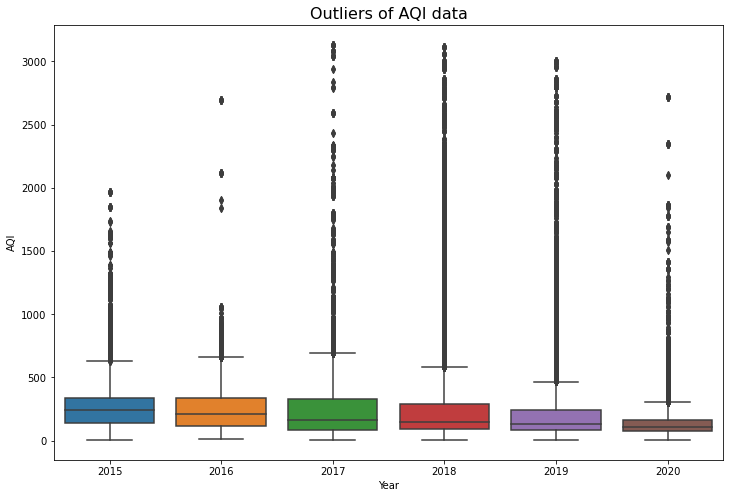

In [88]:
columns = 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'
col = 'AQI'
plt.figure(figsize=(12,8))
a = sns.boxplot(x= 'Year', y = col, data= india_data)
a.set_title(f"Outliers of {col} data", fontsize=16)
display()

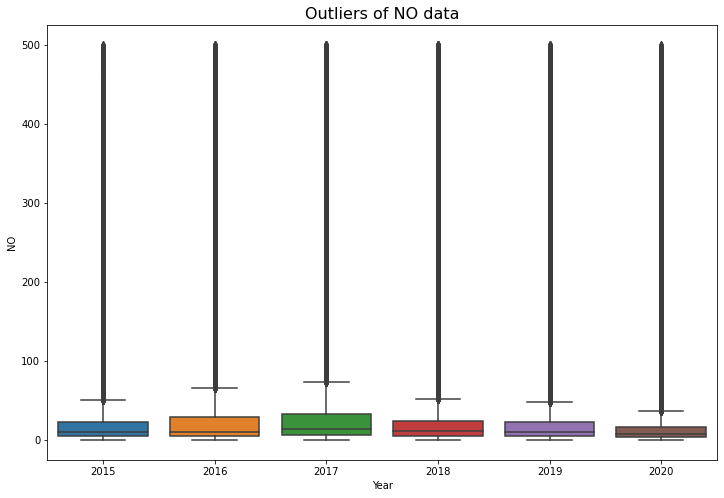

In [89]:
col = 'NO'
plt.figure(figsize=(12,8))
a = sns.boxplot(x= 'Year', y = col, data= india_data)
a.set_title(f"Outliers of {col} data", fontsize=16)
display()

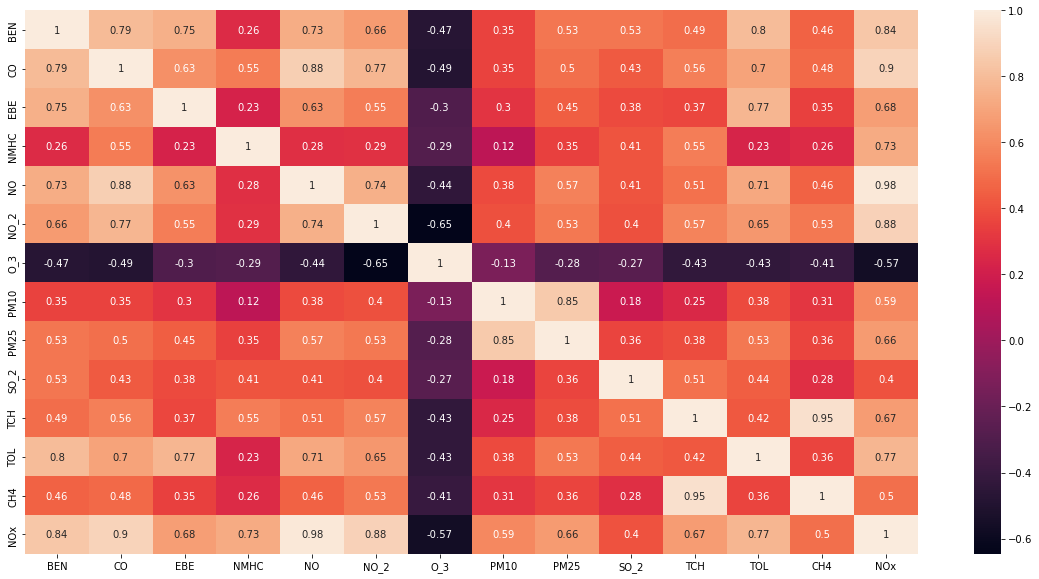

In [111]:
madrid_data_heatmap = madrid_data.drop(['station'], axis = 1)
plt.figure(figsize=(20,10))
sns.heatmap(madrid_data_heatmap.corr(),annot=True)
plt.show()

In [112]:
filtered_dataframe_india = india_data
filtered_dataframe_india['V_P_C'] = filtered_dataframe_india['PM2.5']+filtered_dataframe_india['PM10']+filtered_dataframe_india['NO']+filtered_dataframe_india['NO2']+filtered_dataframe_india['NOx']+filtered_dataframe_india['NH3']+filtered_dataframe_india['CO']
filtered_dataframe_india['I_P_C'] = filtered_dataframe_india['SO2']+filtered_dataframe_india['O3']+filtered_dataframe_india['Benzene']+filtered_dataframe_india['Toluene']+filtered_dataframe_india['Xylene']

In [116]:
most_polluted_citites = filtered_dataframe_india.groupby(['City']).agg({'I_P_C': ['mean']})
most_polluted_citites = most_polluted_citites.reset_index()
most_polluted_citites_by_industry = []
for index, row in most_polluted_citites.iterrows():
    most_polluted_citites_by_industry.append({'City' : row[0], 'I_P_C': row[1]})
most_polluted_citites_by_industry = pd.DataFrame(most_polluted_citites_by_industry)
most_polluted_citites_by_industry = most_polluted_citites_by_industry.dropna()

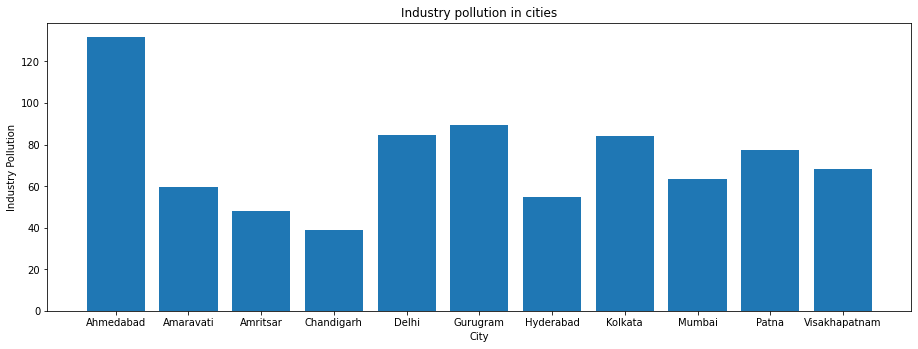

In [117]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(most_polluted_citites_by_industry['City'], most_polluted_citites_by_industry['I_P_C'])
ax.set_xlabel('City')
ax.set_ylabel('Industry Pollution')
ax.set_title('Industry pollution in cities')
plt.show()

In [118]:
most_polluted_citites = filtered_dataframe_india.groupby(['City']).agg({'V_P_C': ['mean']})
most_polluted_citites = most_polluted_citites.reset_index()
most_polluted_citites_by_vehicle = []
for index, row in most_polluted_citites.iterrows():
    most_polluted_citites_by_vehicle.append({'City' : row[0], 'V_P_C': row[1]})
most_polluted_citites_by_vehicle = pd.DataFrame(most_polluted_citites_by_vehicle)
most_polluted_citites_by_vehicle = most_polluted_citites_by_vehicle.dropna()

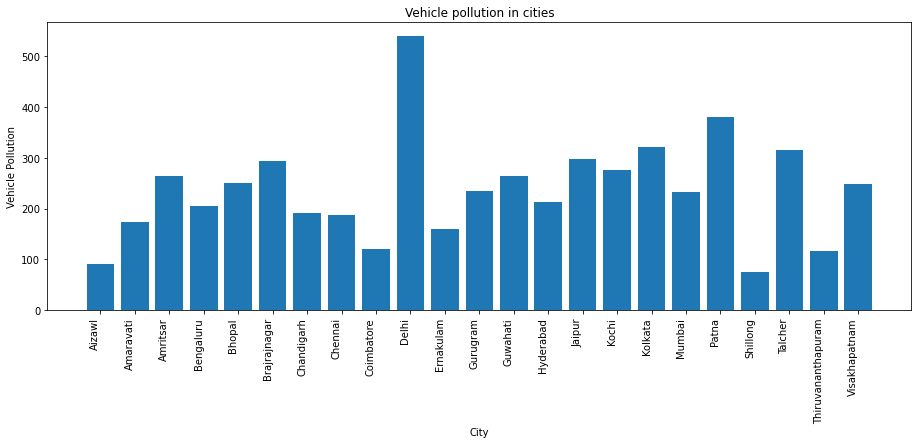

<Figure size 864x576 with 0 Axes>

In [133]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
plt.figure(figsize=(12,8))
ax.bar(most_polluted_citites_by_vehicle['City'], most_polluted_citites_by_vehicle['V_P_C'])
ax.set_xlabel('City')
ax.set_ylabel('Vehicle Pollution')
ax.set_title('Vehicle pollution in cities')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [ ]:
filtered_india_data = india_data.dropna()
filtered_madrid_data = madrid_data.dropna()